In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header = None)
iris.tail

ImportError: dlopen(/opt/homebrew/Caskroom/miniforge/base/envs/test_opencv/lib/python3.8/site-packages/matplotlib/ft2font.cpython-38-darwin.so, 2): Symbol not found: _FT_Done_Face
  Referenced from: /opt/homebrew/Caskroom/miniforge/base/envs/test_opencv/lib/python3.8/site-packages/matplotlib/ft2font.cpython-38-darwin.so
  Expected in: flat namespace
 in /opt/homebrew/Caskroom/miniforge/base/envs/test_opencv/lib/python3.8/site-packages/matplotlib/ft2font.cpython-38-darwin.so

<AxesSubplot:>

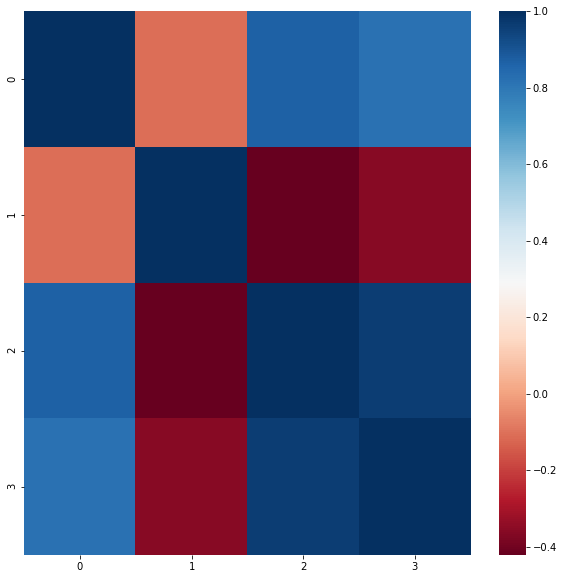

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize =(10,10))
corr = iris.corr()
sns.heatmap(corr,cmap='RdBu')

In [3]:
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)


AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
# class perceptron:
#     def __init__(self, eta=0.01, n_iter=50, random_state=1):
#         self.eta = eta
#         self.n_iter = n_iter
#         self.random_state = random_state
    
#     def fit(self, x, y):
#         rgen = np.random.RandomState(self.random_state)
#         self.w = rgen.normal(loc=0.0, scale=0.01, size =1 + x.shape[1])
        
#         self.errors = []
        
#         for _ in range(self.n_iter):
#             errors = 0
#             for xi, target in zip(x,y):
#                 update = self.eta * (target - self.predict(xi))
#                 self.w[1:] += update * xi
#                 self.w[0] += update
#                 errors += int(update != 0.0)
            
#             self.errors.append(errors)
        
#         return self
    
#     def net_input(self,x):
#         return np.dot(x, self.w[1:] + self.w[0])
    
#     def prdict(self, x):
#         return np.where(self.net_input(x) >= 0.0, 1, -1)
    

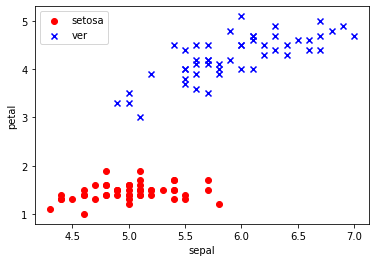

In [4]:
y = iris.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1,1)
x = iris.iloc[0:100,[0,2]].values

plt.scatter(x[0:50,0], x[0:50,1], color='red', marker='o', label = 'setosa')
plt.scatter(x[50:100,0], x[50:100,1], color='blue', marker = 'x', label = 'ver')
plt.xlabel('sepal')
plt.ylabel('petal')
plt.legend(loc='upper left')
plt.show()

# ppn = perceptron(eta = 0.1, n_iter = 10)
# ppn.fit(x, y)
# plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker = 'o')
# plt.xlabel('Epochs')
# plt.ylabel('Number of Errors')
# plot.show()

In [ ]:
# 아달린 알고리즘(적응력 선현 뉴런)
# 진짜 클래스 레이브로과 선형 활성 함수의 실수 출력값을 비교해 모델의 오차를 계산하고 가중치를 업데이드
# 레이블 간의 오차를 계산하는 퍼셉트론 보다 선능이 높다.


In [5]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + x.shape[1])
        self.costs = []
    
        for i in range(self.n_iter):
            net_input = self.net_input(x)
            output = self.activate(net_input)
            errors = y - output
            self.w[1:] += self.eta * x.T.dot(errors)
            self.w[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.costs.append(cost)
        return self
    
    def net_input(self,x):
        return np.dot(x, self.w[1:]) + self.w[0]
    
    def activate(self,x):
        return x
    
    def predict(self, x):
        return np.where(self.activate(self.net_input(x)) >= 0.0, 1, -1)

Text(0.5, 1.0, 'Adaline - Learning_rate = 0.0001')

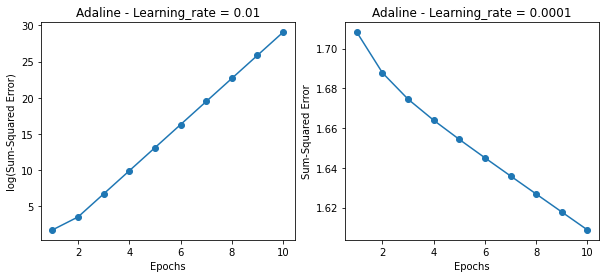

In [7]:
y = iris.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
x = iris.iloc[0:100,[0,2]].values

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(x,y)
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(x,y)

ax[0].plot(range(1, len(ada1.costs) + 1), np.log10(ada1.costs), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-Squared Error)')
ax[0].set_title('Adaline - Learning_rate = 0.01')

ax[1].plot(range(1, len(ada2.costs) + 1), np.log10(ada2.costs), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-Squared Error')
ax[1].set_title('Adaline - Learning_rate = 0.0001')

In [ ]:
#왼쪽의 경우 학습률을 너무 높게 잡아서 비용함수가 최소화되지 못하고 오차가 증가
#오른쪽의 경우 학습률이 너무 작아서 기울기의 이동을 아주 미세하게 진행하고 있다.

# 표준화를 하여 적은 단계를 거쳐 최적의 값을 찾아 낼 수 있다.


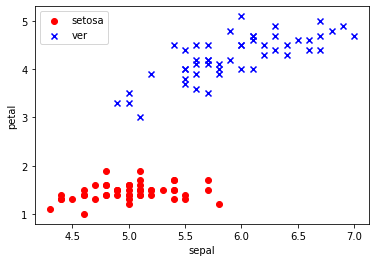

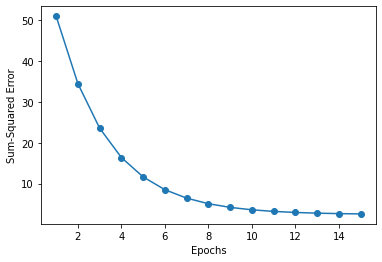

In [6]:
x_std = np.copy(x)
x_std[:,0] = (x[:,0]-x[:,0].mean()) / x[:,0].std()
x_std[:,1] = (x[:,1]-x[:,1].mean()) / x[:,1].std()

ada_standard = AdalineGD(n_iter=15, eta = 0.01)
ada_standard.fit(x_std,y)

plt.scatter(x[0:50,0], x[0:50,1], color='red', marker='o', label = 'setosa')
plt.scatter(x[50:100,0], x[50:100,1], color='blue', marker = 'x', label = 'ver')
plt.xlabel('sepal')
plt.ylabel('petal')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada_standard.costs)+1), ada_standard.costs, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-Squared Error')
plt.show()

In [2]:
import sys
print(sys.path)

['/Users/parkhun/Documents', '/Users/parkhun/opt/anaconda3/lib/python38.zip', '/Users/parkhun/opt/anaconda3/lib/python3.8', '/Users/parkhun/opt/anaconda3/lib/python3.8/lib-dynload', '', '/Users/parkhun/opt/anaconda3/lib/python3.8/site-packages', '/Users/parkhun/opt/anaconda3/lib/python3.8/site-packages/aeosa', '/Users/parkhun/opt/anaconda3/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg', '/Users/parkhun/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/Users/parkhun/.ipython']


In [3]:
sys.path.append('/opt/homebrew/Caskroom/miniforge/base/envs/test_opencv')

In [4]:
print(sys.path)

['/Users/parkhun/Documents', '/Users/parkhun/opt/anaconda3/lib/python38.zip', '/Users/parkhun/opt/anaconda3/lib/python3.8', '/Users/parkhun/opt/anaconda3/lib/python3.8/lib-dynload', '', '/Users/parkhun/opt/anaconda3/lib/python3.8/site-packages', '/Users/parkhun/opt/anaconda3/lib/python3.8/site-packages/aeosa', '/Users/parkhun/opt/anaconda3/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg', '/Users/parkhun/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/Users/parkhun/.ipython', '/opt/homebrew/Caskroom/miniforge/base/envs/test_opencv']


In [ ]:
import tensorflow as tf

In [5]:
pip install matplotlib

  Using cached matplotlib-3.4.2-cp38-cp38-macosx_11_0_arm64.whl
  Using cached kiwisolver-1.3.1-cp38-cp38-macosx_11_0_arm64.whl
  Using cached Pillow-8.2.0-cp38-cp38-macosx_11_0_arm64.whl
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/opt/homebrew/Caskroom/miniforge/base/envs/test_opencv/lib/python3.8/site-packages/cycler-0.10.0.dist-info/METADATA'

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
train = pd.read_csv('train.csv')

AttributeError: module 'pandas' has no attribute 'read_csv'

In [1]:
pip install seabon

ERROR: Could not find a version that satisfies the requirement seabon (from versions: none)
ERROR: No matching distribution found for seabon
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

     |████████████████████████████████| 285 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 27.2 MB 34.5 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-standalone-pip-ymx12ofj/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-build-env-5h48f909/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- 'wheel<0.37.0' 'setuptools<=51.0.0' 'Cython>=0.29.18,<3.0' 'pybind11>=2.4.3,<2.7.0' 'numpy==1.19.2; python_version=='"'"'3.6'"'"' and platform_machine=='"'"'aarch64'"'"'' 'numpy==1.19.2; python_version=='"'"'3.7'"'"' and platform_machine=='"'"'aarch64'"'"'' 'numpy==1.16.5; python_version=='"'"'3.6'"'"' and platform_machine!='"'"'aarch64'"'"' and platform_python_

      numpy.core - nothing done with h_files = ['build/src.macosx-11.0-arm64-3.8/numpy/core/src/umath/funcs.inc', 'build/src.macosx-11.0-arm64-3.8/numpy/core/src/umath/simd.inc', 'build/src.macosx-11.0-arm64-3.8/numpy/core/src/umath/loops.h', 'build/src.macosx-11.0-arm64-3.8/numpy/core/src/umath/matmul.h', 'build/src.macosx-11.0-arm64-3.8/numpy/core/src/umath/clip.h', 'build/src.macosx-11.0-arm64-3.8/numpy/core/src/npymath/npy_math_internal.h', 'build/src.macosx-11.0-arm64-3.8/numpy/core/src/common/templ_common.h', 'build/src.macosx-11.0-arm64-3.8/numpy/core/include/numpy/config.h', 'build/src.macosx-11.0-arm64-3.8/numpy/core/include/numpy/_numpyconfig.h', 'build/src.macosx-11.0-arm64-3.8/numpy/core/include/numpy/__multiarray_api.h', 'build/src.macosx-11.0-arm64-3.8/numpy/core/include/numpy/__ufunc_api.h']
      building extension "numpy.core._umath_tests" sources
      building extension "numpy.core._rational_tests" sources
      building extension "numpy.core._struct_ufunc_tests" sou

     |██                              | 1.6 MB 15.0 MB/s eta 0:00:02

     |███▉                            | 3.2 MB 15.0 MB/s eta 0:00:02

     |████████████████████████████████| 27.2 MB 23.6 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-standalone-pip-whjvhxrd/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-build-env-gtijcegh/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- 'wheel<0.37.0' 'setuptools<=51.0.0' 'Cython>=0.29.18,<3.0' 'pybind11>=2.4.3,<2.7.0' 'numpy==1.19.2; python_version=='"'"'3.6'"'"' and platform_machine=='"'"'aarch64'"'"'' 'numpy==1.19.2; python_version=='"'"'3.7'"'"' and platform_machine=='"'"'aarch64'"'"'' 'numpy==1.16.5; python_version=='"'"'3.6'"'"' and platform_machine!='"'"'aarch64'"'"' and platform_python_implementation != '"'"'PyPy'"'"'' 'numpy==1.16.5; python_version=='"

    _configtest.c:27:5: note: 'fmodf' is a builtin with type 'float (float, float)'
    _configtest.c:28:5: warning: incompatible redeclaration of library function 'modff' [-Wincompatible-library-redeclaration]
    int modff (void);
        ^
    _configtest.c:28:5: note: 'modff' is a builtin with type 'float (float, float *)'
    _configtest.c:29:5: warning: incompatible redeclaration of library function 'frexpf' [-Wincompatible-library-redeclaration]
    int frexpf (void);
        ^
    _configtest.c:29:5: note: 'frexpf' is a builtin with type 'float (float, int *)'
    _configtest.c:30:5: warning: incompatible redeclaration of library function 'ldexpf' [-Wincompatible-library-redeclaration]
    int ldexpf (void);
        ^
    _configtest.c:30:5: note: 'ldexpf' is a builtin with type 'float (float, int)'
    _configtest.c:31:5: warning: incompatible redeclaration of library function 'exp2f' [-Wincompatible-library-redeclaration]
    int exp2f (void);
        ^
    _configtest.c:31:5

     |████████████████████████████████| 27.3 MB 1.6 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-standalone-pip-jdi8awvp/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-build-env-49wki7t8/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel 'setuptools<=51.0.0' 'Cython>=0.29.18' 'pybind11>=2.4.3' 'numpy==1.19.2; python_version=='"'"'3.6'"'"' and platform_machine=='"'"'aarch64'"'"'' 'numpy==1.19.2; python_version=='"'"'3.7'"'"' and platform_machine=='"'"'aarch64'"'"'' 'numpy==1.16.5; python_version=='"'"'3.6'"'"' and platform_machine!='"'"'aarch64'"'"' and platform_python_implementation != '"'"'PyPy'"'"'' 'numpy==1.16.5; python_version=='"'"'3.7'"'"' and platfo

        return (__m64)__builtin_ia32_paddusb((__v8qi)__m1, (__v8qi)__m2);
               ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/12.0.5/include/mmintrin.h:483:12: error: invalid conversion between vector type '__m64' (vector of 1 'long long' value) and integer type 'int' of different size
        return (__m64)__builtin_ia32_paddusw((__v4hi)__m1, (__v4hi)__m2);
               ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/12.0.5/include/mmintrin.h:504:12: error: invalid conversion between vector type '__m64' (vector of 1 'long long' value) and integer type 'int' of different size
        return (__m64)__builtin_ia32_psubb((__v8qi)__m1, (__v8qi)__m2);
               ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    /Applications/Xcode.app/Contents/Developer/

     |████████████████████████████████| 27.3 MB 1.3 MB/s eta 0:00:01     |██████████████████████████████▎ | 25.8 MB 3.0 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-standalone-pip-1sf3cn6n/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-build-env-ic5hhm5h/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel 'setuptools<=51.0.0' 'Cython>=0.29.18' 'numpy==1.16.5; python_version=='"'"'3.7'"'"'' 'numpy==1.17.3; python_version=='"'"'3.8'"'"'' 'numpy==1.19.3; python_version=='"'"'3.9'"'"'' 'numpy; python_version>='"'"'3.10'"'"'' 'pybind11>=2.4.3'
       cwd: None
  Complete output (3662 lines):
  Ignoring numpy: markers 'python_version == "3.7"' don't match your env

      gcc: numpy/core/src/multiarray/common.c
      gcc: numpy/core/src/multiarray/datetime_strings.c
      gcc: numpy/core/src/multiarray/descriptor.c
      gcc: build/src.macosx-11.0-arm64-3.8/numpy/core/src/multiarray/einsum.c
      gcc: numpy/core/src/multiarray/conversion_utils.c
      clang: error: the clang compiler does not support 'faltivec', please use -maltivec and include altivec.h explicitly
      clang: error: the clang compiler does not support 'faltivec', please use -maltivec and include altivec.h explicitly
      clang: error: the clang compiler does not support 'faltivec', please use -maltivec and include altivec.h explicitly
      clang: error: the clang compiler does not support 'faltivec', please use -maltivec and include altivec.h explicitly
      gcc: numpy/core/src/multiarray/multiarraymodule.c
      gcc: numpy/core/src/multiarray/nditer_constr.c
      clang: error: the clang compiler does not support 'faltivec', please use -maltivec and include altivec.h explic

    C compiler: gcc -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/opt/homebrew/Caskroom/miniforge/base/envs/mypy/include -arch arm64 -I/opt/homebrew/Caskroom/miniforge/base/envs/mypy/include -arch arm64
  
    compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/opt/homebrew/Caskroom/miniforge/base/envs/mypy/include/python3.8 -c'
    gcc: _configtest.c
    removing: _configtest.c _configtest.o _configtest.o.d
    C compiler: gcc -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/opt/homebrew/Caskroom/miniforge/base/envs/mypy/include -arch arm64 -I/opt/homebrew/Caskroom/miniforge/base/envs/mypy/include -arch arm64
  
    compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/c

     |████████████████████████████████| 25.2 MB 1.4 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-standalone-pip-5550hmjk/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-build-env-bz05651w/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.18' 'numpy==1.14.5; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and platform_system=='"'

     |████████████████████████████████| 25.4 MB 1.6 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-standalone-pip-wby1o3b2/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-build-env-12x9w70g/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.18' 'numpy==1.14.5; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and platform_system=='"'

        return (__m64)__builtin_ia32_psubb((__v8qi)__m1, (__v8qi)__m2);
               ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/12.0.5/include/mmintrin.h:525:12: error: invalid conversion between vector type '__m64' (vector of 1 'long long' value) and integer type 'int' of different size
        return (__m64)__builtin_ia32_psubw((__v4hi)__m1, (__v4hi)__m2);
               ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    fatal error: too many errors emitted, stopping now [-ferror-limit=]
    20 errors generated.
    failure.
    removing: _configtest.c _configtest.o
    C compiler: gcc -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/opt/homebrew/Caskroom/miniforge/base/envs/mypy/include -arch arm64 -I/opt/homebrew/Caskroom/miniforge/base/envs/mypy/include -arch arm64
  
    compile options: '-Inumpy/core/src

     |████████████████████████████████| 25.6 MB 1.6 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-standalone-pip-nfietf4o/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-build-env-mt5h0dld/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.18' 'numpy==1.14.5; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and platform_system=='"'

     |████████████████████████████████| 25.6 MB 1.4 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-standalone-pip-vioytfuz/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-build-env-1z5x2fxe/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.18' 'numpy==1.14.5; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and platform_system=='"'

      libraries lapack_atlas not found in /usr/local/lib
    customize UnixCCompiler
      libraries f77blas,cblas,atlas not found in /usr/local/lib
    customize UnixCCompiler
      libraries lapack_atlas not found in /usr/lib
    customize UnixCCompiler
      libraries f77blas,cblas,atlas not found in /usr/lib
    <class 'numpy.distutils.system_info.atlas_info'>
      NOT AVAILABLE
  
      FOUND:
        extra_compile_args = ['-faltivec', '-I/System/Library/Frameworks/vecLib.framework/Headers']
        extra_link_args = ['-Wl,-framework', '-Wl,Accelerate']
        define_macros = [('NO_ATLAS_INFO', 3), ('HAVE_CBLAS', None)]
  
    /opt/homebrew/Caskroom/miniforge/base/envs/mypy/lib/python3.8/distutils/dist.py:274: UserWarning: Unknown distribution option: 'define_macros'
      warnings.warn(msg)
    running bdist_wheel
    running build
    running config_cc
    unifing config_cc, config, build_clib, build_ext, build commands --compiler options
    running config_fc
    unifing conf

     |████████████████████████████████| 24.6 MB 1.4 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-standalone-pip-mswilb8p/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-build-env-i8hanygw/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.13' 'numpy==1.13.3; python_version=='"'"'3.5'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.5'"'"' and platform_system=='"'

               ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/12.0.5/include/mmintrin.h:129:12: error: invalid conversion between vector type '__m64' (vector of 1 'long long' value) and integer type 'int' of different size
        return (__m64)__builtin_ia32_packsswb((__v4hi)__m1, (__v4hi)__m2);
               ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/12.0.5/include/mmintrin.h:159:12: error: invalid conversion between vector type '__m64' (vector of 1 'long long' value) and integer type 'int' of different size
        return (__m64)__builtin_ia32_packssdw((__v2si)__m1, (__v2si)__m2);
               ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/12.0.5/include/mmintrin.h:189:

     |████████████████████████████████| 24.6 MB 1.5 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-standalone-pip-p36564sn/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-build-env-vizl437y/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.13' 'numpy==1.13.3; python_version=='"'"'3.5'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.5'"'"' and platform_system=='"'

     |████████████████████████████████| 23.8 MB 1.3 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-standalone-pip-fzqiby5k/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-build-env-yiezlb8r/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.13' 'numpy==1.13.3; python_version=='"'"'3.5'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.5'"'"' and platform_system=='"'

    copying numpy/doc/byteswapping.py -> build/lib.macosx-11.0-arm64-3.8/numpy/doc
    copying numpy/doc/structured_arrays.py -> build/lib.macosx-11.0-arm64-3.8/numpy/doc
    copying numpy/doc/glossary.py -> build/lib.macosx-11.0-arm64-3.8/numpy/doc
    creating build/lib.macosx-11.0-arm64-3.8/numpy/f2py
    copying numpy/f2py/cfuncs.py -> build/lib.macosx-11.0-arm64-3.8/numpy/f2py
    copying numpy/f2py/common_rules.py -> build/lib.macosx-11.0-arm64-3.8/numpy/f2py
    copying numpy/f2py/crackfortran.py -> build/lib.macosx-11.0-arm64-3.8/numpy/f2py
    copying numpy/f2py/cb_rules.py -> build/lib.macosx-11.0-arm64-3.8/numpy/f2py
    copying numpy/f2py/__init__.py -> build/lib.macosx-11.0-arm64-3.8/numpy/f2py
    copying numpy/f2py/rules.py -> build/lib.macosx-11.0-arm64-3.8/numpy/f2py
    copying numpy/f2py/f2py2e.py -> build/lib.macosx-11.0-arm64-3.8/numpy/f2py
    copying numpy/f2py/func2subr.py -> build/lib.macosx-11.0-arm64-3.8/numpy/f2py
    copying numpy/f2py/__version__.py -> bui

     |████████████████████████████████| 23.6 MB 1.3 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-standalone-pip-ifhnna06/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-build-env-9xiucssx/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.13' 'numpy==1.13.3; python_version=='"'"'3.5'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.5'"'"' and platform_system=='"'

    compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/opt/homebrew/Caskroom/miniforge/base/envs/mypy/include/python3.8 -c'
    gcc: _configtest.c
    success!
    removing: _configtest.c _configtest.o _configtest.o.d
    C compiler: gcc -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/opt/homebrew/Caskroom/miniforge/base/envs/mypy/include -arch arm64 -I/opt/homebrew/Caskroom/miniforge/base/envs/mypy/include -arch arm64
  
    compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/opt/homebrew/Caskroom/miniforge/base/envs/mypy/include/python3.8 -c'
    gcc: _configtest.c
    _configtest.c:8:12: error: use of undeclared identifier 'HAVE_DECL_SIGNBIT'
        (void) HAVE_DECL_SIGNBIT;
     

     |████████████████████████████████| 23.6 MB 1.3 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-standalone-pip-naxwq0x9/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-build-env-uvvh89pr/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.2' 'numpy==1.13.3; python_version=='"'"'3.5'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version>='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.5'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"

    /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/12.0.5/include/mmintrin.h:50:12: error: invalid conversion between vector type '__m64' (vector of 1 'long long' value) and integer type 'int' of different size
        return (__m64)__builtin_ia32_vec_init_v2si(__i, 0);
               ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/12.0.5/include/mmintrin.h:129:12: error: invalid conversion between vector type '__m64' (vector of 1 'long long' value) and integer type 'int' of different size
        return (__m64)__builtin_ia32_packsswb((__v4hi)__m1, (__v4hi)__m2);
               ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/12.0.5/include/mmintrin.h:159:12: error: invalid conversion between vector type '__m64' (vector of 1 'long long' value) 

     |████████████████████████████████| 23.6 MB 1.5 MB/s eta 0:00:01
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-standalone-pip-wyi5a2np/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-build-env-3dugqdui/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.2' 'numpy==1.13.3; python_version=='"'"'3.5'"'"'' 'numpy==1.13.3; python_version=='"'"'3.6'"'"'' 'numpy==1.14.5; python_version>='"'"'3.7'"'"''
       cwd: None
  Complete output (3694 lines):
  Ignoring numpy: markers 'python_version == "3.5"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6"' don't match your environment
    Using cached wheel-0.36.2-py2.py3-none-any.

    _configtest.c:17:5: note: 'creall' is a builtin with type 'long double (_Complex long double)'
    _configtest.c:18:5: warning: incompatible redeclaration of library function 'csinl' [-Wincompatible-library-redeclaration]
    int csinl (void);
        ^
    _configtest.c:18:5: note: 'csinl' is a builtin with type '_Complex long double (_Complex long double)'
    _configtest.c:19:5: warning: incompatible redeclaration of library function 'csinhl' [-Wincompatible-library-redeclaration]
    int csinhl (void);
        ^
    _configtest.c:19:5: note: 'csinhl' is a builtin with type '_Complex long double (_Complex long double)'
    _configtest.c:20:5: warning: incompatible redeclaration of library function 'csqrtl' [-Wincompatible-library-redeclaration]
    int csqrtl (void);
        ^
    _configtest.c:20:5: note: 'csqrtl' is a builtin with type '_Complex long double (_Complex long double)'
    _configtest.c:21:5: warning: incompatible redeclaration of library function 'ctanl' [-Wincomp

     |████████████████████████████████| 23.3 MB 20.2 MB/s eta 0:00:01
  ERROR: Command errored out with exit status 1:
   command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-install-ohf1nqh7/scipy_ad7b695cbf61402ca1859520e29fa693/setup.py'"'"'; __file__='"'"'/private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-install-ohf1nqh7/scipy_ad7b695cbf61402ca1859520e29fa693/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-wheel-at7v7j5s
       cwd: /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-install-ohf1nqh7/scipy_ad7b695cbf61402ca1

    Running setup.py install for scipy ... error
    ERROR: Command errored out with exit status 1:
     command: /opt/homebrew/Caskroom/miniforge/base/envs/mypy/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-install-ohf1nqh7/scipy_ad7b695cbf61402ca1859520e29fa693/setup.py'"'"'; __file__='"'"'/private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-install-ohf1nqh7/scipy_ad7b695cbf61402ca1859520e29fa693/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/p0/tp0r31yj0b9b4n523sb7hxcw0000gn/T/pip-record-eu9gtkd_/install-record.txt --single-version-externally-managed --compile --install-headers /opt/homebrew/Caskroom/miniforge/base/envs/my